In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Sara Chandio\\Documents\\Capstone\\kachra\\purakachra.csv')
print(df.shape)
df.head()

(4140, 22)


,Facility ID,Staff Responsiveness,Cleanliness,Nurse com,Doc Com,Com Abt Med,Ct_Dischar_info,courtesy,recommend,quietness,...,City,State,ZIP Code,County Name,Phone Number,HCAHPS Answer Percent,Number of Completed Surveys,Survey Response Rate Percent,Location,Patient Survey Star Rating
0,52004,46.666667,47.0,49.000000,48.666667,45.500000,67.571429,48.875,49.0,45.0,...,MADISON,WI,53705,DANE,(608) 256-1901,18,413,47,POINT (-89.433629 43.074477),5
1,670124,15.000000,44.0,46.666667,15.500000,14.166667,24.857143,0.000,47.5,48.5,...,HORIZON CITY,TX,79928,EL PASO,(915) 407-7878,Not Applicable,43,15,POINT (-106.207348 31.682723),Not Available
2,52003,46.000000,47.0,48.833333,48.666667,43.833333,64.142857,48.500,48.0,46.0,...,MILWAUKEE,WI,53295,MILWAUKEE,(414) 384-2000,Not Applicable,422,42,POINT (-87.976053 43.019558),4
3,52002,47.833333,49.0,48.333333,45.666667,45.500000,65.142857,47.875,47.5,47.0,...,TOMAH,WI,54660,MONROE,(608) 372-3971,Not Applicable,109,35,POINT (-90.49392 44.001108),3
4,670122,46.000000,45.5,16.000000,47.000000,40.000000,63.571429,47.750,48.0,45.5,...,THE WOODLANDS,TX,77385,MONTGOMERY,(936) 270-2000,Not Applicable,1884,21,POINT (-95.45551 30.204697000000003),4


In [3]:
df = df[df['Patient Survey Star Rating'] != "Not Available"]

In [4]:
print(df.shape)
df.head()

(3490, 22)


,Facility ID,Staff Responsiveness,Cleanliness,Nurse com,Doc Com,Com Abt Med,Ct_Dischar_info,courtesy,recommend,quietness,...,City,State,ZIP Code,County Name,Phone Number,HCAHPS Answer Percent,Number of Completed Surveys,Survey Response Rate Percent,Location,Patient Survey Star Rating
0,52004,46.666667,47.0,49.000000,48.666667,45.500000,67.571429,48.875,49.0,45.0,...,MADISON,WI,53705,DANE,(608) 256-1901,18,413,47,POINT (-89.433629 43.074477),5
2,52003,46.000000,47.0,48.833333,48.666667,43.833333,64.142857,48.500,48.0,46.0,...,MILWAUKEE,WI,53295,MILWAUKEE,(414) 384-2000,Not Applicable,422,42,POINT (-87.976053 43.019558),4
3,52002,47.833333,49.0,48.333333,45.666667,45.500000,65.142857,47.875,47.5,47.0,...,TOMAH,WI,54660,MONROE,(608) 372-3971,Not Applicable,109,35,POINT (-90.49392 44.001108),3
4,670122,46.000000,45.5,16.000000,47.000000,40.000000,63.571429,47.750,48.0,45.5,...,THE WOODLANDS,TX,77385,MONTGOMERY,(936) 270-2000,Not Applicable,1884,21,POINT (-95.45551 30.204697000000003),4
5,51005,46.000000,46.0,48.166667,46.000000,44.000000,64.142857,47.750,47.5,43.0,...,MARTINSBURG,WV,25405,BERKELEY,(304) 263-0811,Not Applicable,346,36,POINT (-77.914109 39.415543),3


In [5]:
df_hc = df.drop(columns=['Facility ID ','ZIP Code','Number of Completed Surveys','Survey Response Rate Percent','Facility Name','Address','City','State','County Name','Phone Number','HCAHPS Answer Percent','Location'])

In [6]:
from pycaret.classification import *

In [7]:
class_exp = setup(
    data=df_hc.drop(columns=['recommend']), 
    normalize=True, 
    remove_outliers=True, target="Patient Survey Star Rating",
    outliers_threshold=0.1
)

,Description,Value
0,session_id,4332
1,Target,Patient Survey Star Rating
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original Data,"(3490, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6727,0.8372,0.4648,0.6647,0.6618,0.4753,0.4789,0.4850
lda,Linear Discriminant Analysis,0.6604,0.8311,0.4598,0.6544,0.6517,0.4596,0.4621,0.0150
gbc,Gradient Boosting Classifier,0.6545,0.8227,0.4749,0.6494,0.6478,0.4547,0.4568,0.3150
rf,Random Forest Classifier,0.6536,0.8239,0.4589,0.6483,0.6452,0.4504,0.4531,0.0980
et,Extra Trees Classifier,0.6518,0.8270,0.4478,0.6456,0.6416,0.4443,0.4475,0.0950
qda,Quadratic Discriminant Analysis,0.6486,0.8213,0.4767,0.6414,0.6417,0.4470,0.4485,0.0120
knn,K Neighbors Classifier,0.6222,0.7814,0.4426,0.6171,0.6156,0.4042,0.4059,0.0130
lightgbm,Light Gradient Boosting Machine,0.6158,0.8061,0.4382,0.6091,0.6088,0.3941,0.3961,0.1040
ridge,Ridge Classifier,0.6126,0.0000,0.2983,0.4871,0.5413,0.3310,0.3505,0.0060
nb,Naive Bayes,0.6117,0.8197,0.5098,0.6294,0.6137,0.4273,0.4309,0.0070


In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7000,0.8692,0.4936,0.6828,0.6835,0.5165,0.5210
1,0.6636,0.8338,0.4469,0.6520,0.6482,0.4519,0.4593
2,0.6636,0.8386,0.4492,0.6530,0.6534,0.4620,0.4643
3,0.7227,0.8688,0.4930,0.7165,0.7118,0.5541,0.5577
4,0.6409,0.8206,0.4606,0.6303,0.6348,0.4364,0.4369
5,0.7045,0.8429,0.4988,0.6991,0.6946,0.5309,0.5342
6,0.6455,0.8138,0.4371,0.6368,0.6331,0.4289,0.4332
7,0.6941,0.8534,0.5017,0.6858,0.6878,0.5181,0.5198
8,0.6758,0.8347,0.4531,0.6704,0.6645,0.4772,0.4813
9,0.6164,0.7959,0.4142,0.6198,0.6063,0.3768,0.3810


In [10]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7045,0.8694,0.4955,0.6871,0.6878,0.5233,0.5282
1,0.6773,0.8330,0.4544,0.6652,0.6620,0.4747,0.4819
2,0.6591,0.8397,0.4532,0.6487,0.6501,0.4571,0.4588
3,0.7091,0.8667,0.4855,0.7037,0.6986,0.5317,0.5353
4,0.6545,0.8197,0.4681,0.6440,0.6482,0.4569,0.4575
5,0.7000,0.8438,0.4960,0.6951,0.6903,0.5245,0.5278
6,0.6545,0.8132,0.4428,0.6457,0.6425,0.4447,0.4486
7,0.7032,0.8545,0.5055,0.6951,0.6964,0.5315,0.5339
8,0.6667,0.8348,0.4475,0.6617,0.6552,0.4612,0.4658
9,0.6119,0.7955,0.4200,0.6136,0.6032,0.3723,0.3759


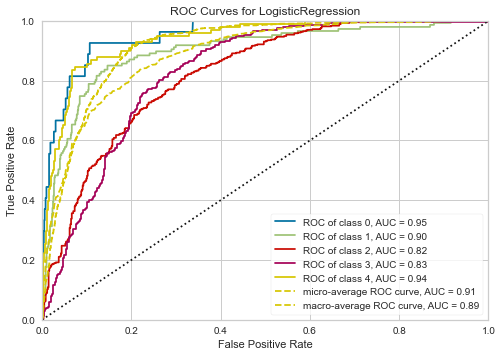

In [11]:
plot_model(tuned_lr, plot = 'auc')

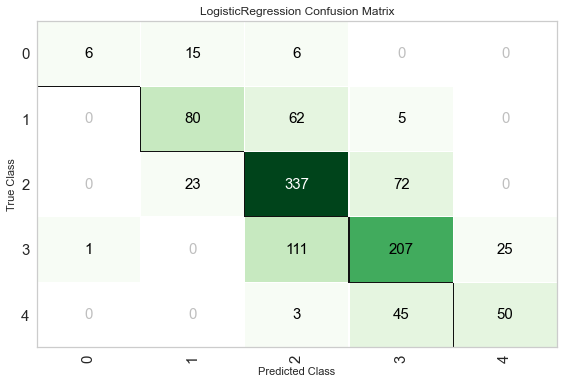

In [12]:
plot_model(tuned_lr, 'confusion_matrix')

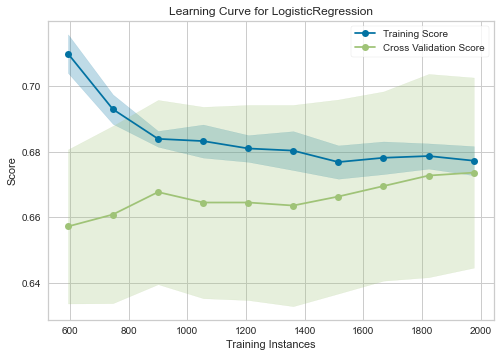

In [13]:
plot_model(tuned_lr, 'learning')

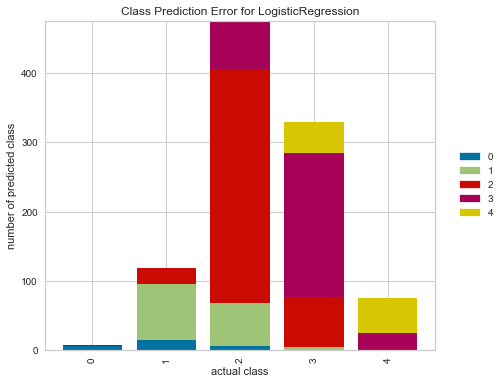

In [14]:
plot_model(tuned_lr, 'error')

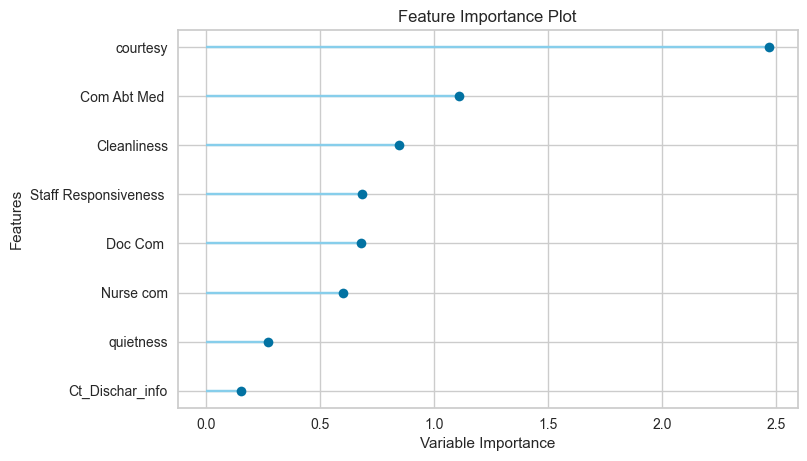

In [16]:
plot_model(tuned_lr, 'feature')

In [18]:
X = df_hc.drop(columns=['recommend', 'Patient Survey Star Rating'])
y = df_hc['Patient Survey Star Rating']

In [33]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
tuned_lr

LogisticRegression(C=5.91, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4332, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
clf_lr = LogisticRegression(C=5.91, fit_intercept=True, intercept_scaling=1, max_iter=1000)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
clf_lr.fit(X_train, y_train)

LogisticRegression(C=5.91, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
clf_lr.score(X_test, y_test)

0.5211912943871707

<AxesSubplot:>

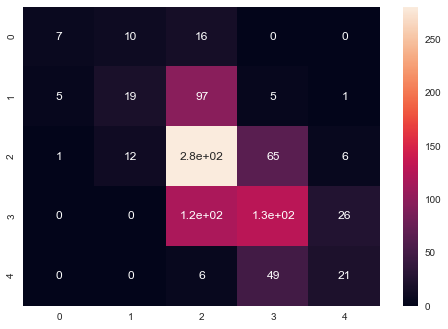

In [35]:
sns.heatmap(confusion_matrix(y_test, clf_lr.predict(X_test)), annot=True)

In [36]:
clf_exp = ClassifierExplainer(clf_lr, X_test, y_test)

Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...


In [37]:
ExplainerDashboard(clf_exp).run()

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating confusion matrices...
Calculating prediction probabilities...
Calculating roc auc curves...
Calculating pred_percentiles...
Calculating classification_dfs...
Calculating pr auc curves...
Calculating predictions...
Calculating liftcurve_dfs...
Calculating metrics...
Calculating shap interaction values... (this may take a while)
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting 

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
10.134.2.228 - - [19/Apr/2021 05:21:44] "GET / HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:44] "GET /_dash-dependencies HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "GET /_dash-layout HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21

Calculating shap interaction values... (this may take a while)


10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Calculating shap interaction values... (this may take a while)
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara ch

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 500 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 500 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 500 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexes\base.py", line 3080, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'precision_5'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\loca

10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 500 -
10.134.2.228 - - [19/Apr/2021 05:21:47] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:50] "GET / HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "GET /_dash-dependencies HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "GET /_dash-layout HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:51] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.

Calculating shap interaction values... (this may take a while)


10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 500 -
10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Calculating shap interaction values... (this may take a while)


10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -
10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexes\base.py", line 3080, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'precision_5'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\users\sara chandio\appdata\local\programs\python\python38\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\sara chandio\appdata\loca

10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 500 -
10.134.2.228 - - [19/Apr/2021 05:29:53] "POST /_dash-update-component HTTP/1.1" 200 -
